In [7]:
import os
import pandas as pd
os.getcwd()
os.chdir("C:/Users/L-ven Lew/Desktop/UM/Semester 5 UM/WQD7006 Machine Learning/Week 10")
os.getcwd()
Dataset = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx')

In [8]:
# Know about the dateset
Dataset.describe()
Dataset.info()
Dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59983 entries, 0 to 59982
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   dateRep                                                     59983 non-null  datetime64[ns]
 1   day                                                         59983 non-null  int64         
 2   month                                                       59983 non-null  int64         
 3   year                                                        59983 non-null  int64         
 4   cases                                                       59983 non-null  int64         
 5   deaths                                                      59983 non-null  int64         
 6   countriesAndTerritories                                     59983 non-null  object        
 7   geoId                 

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          266
countryterritoryCode                                           114
popData2019                                                    114
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2870
dtype: int64

In [9]:
# Feature selection and Data Cleaning
## Feature Selection 
MYDF = Dataset[Dataset["geoId"] == "MY"]
MYDF1 = MYDF[['dateRep','cases']]
MYDF1
MYDF1.rename(columns={'dateRep':'Date'},inplace=True)
MYDF1

C:\Users\L-ven Lew\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Date,cases
39,2019-12-31,0
106,2020-01-01,0
173,2020-01-02,0
240,2020-01-03,0
307,2020-01-04,0
...,...,...
59038,2020-12-01,1212
59251,2020-12-02,1472
59464,2020-12-03,851
59677,2020-12-04,1075


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
## Data Cleaning
MYDF2 = MYDF1.set_index(['Date'])
MYDF2.sort_index(ascending = True)
MYDF3 = MYDF2['cases'].replace(0, 1)    
MYDF3

Date
2019-12-31       1
2020-01-01       1
2020-01-02       1
2020-01-03       1
2020-01-04       1
              ... 
2020-12-01    1212
2020-12-02    1472
2020-12-03     851
2020-12-04    1075
2020-12-05    1141
Name: cases, Length: 340, dtype: int64

(array([737425., 737485., 737546., 737607., 737669., 737730.]),
 <a list of 6 Text major ticklabel objects>)

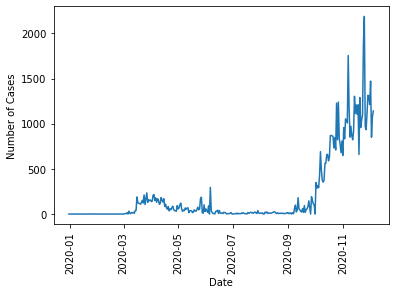

In [11]:
import numpy as np
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.plot(MYDF3)
plt.xticks(rotation=90)

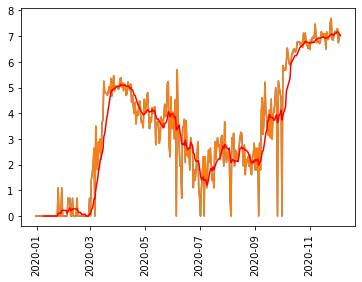

In [22]:
## Detrend and make the data stationary 
# Normalizing the sata
indexedDataset_logScale= np.log(MYDF3)
plt.plot(indexedDataset_logScale)
plt.xticks(rotation=90)
indexedDataset_logScale.dropna(inplace = True)

# Estimate the trend based on moving average
movingAverage = indexedDataset_logScale.rolling(window=10).mean()
movingSTD = indexedDataset_logScale.rolling(window=10).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color ='red')
# Because the trend is moving with the time, we can conclude non-stationary

(array([737425., 737485., 737546., 737607., 737669., 737730.]),
 <a list of 6 Text major ticklabel objects>)

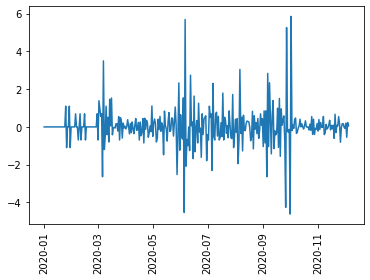

In [13]:
# shift the value into time-series for forecasting
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)
plt.xticks(rotation=90)

In [14]:
datasetLogDiffShifting 
datasetLogDiffShifting1 = datasetLogDiffShifting.dropna()
datasetLogDiffShifting1

Date
2020-01-01    0.000000
2020-01-02    0.000000
2020-01-03    0.000000
2020-01-04    0.000000
2020-01-05    0.000000
                ...   
2020-12-01   -0.076992
2020-12-02    0.194350
2020-12-03   -0.547965
2020-12-04    0.233664
2020-12-05    0.059584
Name: cases, Length: 339, dtype: float64

C:\Users\L-ven Lew\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\L-ven Lew\anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Unrecognized location 'Best'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if sys.path[0] == '':
C:\Users\L-ven Lew\anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Unrecognized location 'Best'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  app.launch_new_instance()
C:\Users\L-ven Lew\anaconda3\lib\site-packa

(array([737425., 737456., 737485., 737516., 737546., 737577., 737607.,
        737638., 737669., 737699., 737730., 737760.]),
 <a list of 12 Text major ticklabel objects>)

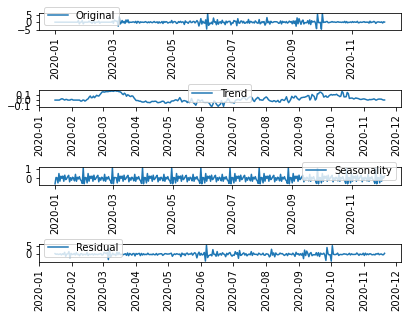

In [17]:
# component of time-series
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(datasetLogDiffShifting1, freq=30) # decompose seasonal and segregate the 3 component


trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(datasetLogDiffShifting1, label ='Original')
plt.legend(loc ='Best')
plt.xticks(rotation=90)
plt.subplot(412)
plt.plot(trend, label ='Trend')
plt.legend(loc ='Best')
plt.xticks(rotation=90)
plt.subplot(413)
plt.plot(seasonal, label ='Seasonality')
plt.legend(loc ='Best')
plt.xticks(rotation=90)
plt.subplot(414)
plt.plot(residual, label = 'Residual')
plt.legend(loc='Best')
plt.tight_layout()
plt.xticks(rotation=90)

C:\Users\L-ven Lew\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


Text(0.5, 1.0, 'Partial Autocorrection Function')

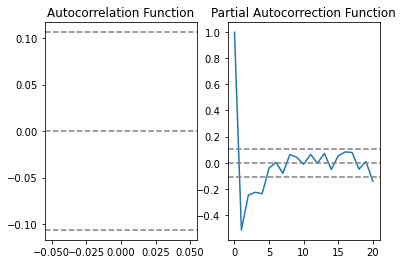

In [24]:
# Plot ACF to calculate q value = Moving Average
# plot PFCA graph to calculate the value of P = Autoregression
from statsmodels.tsa.stattools import acf, pacf 
lag_acf =acf(movingAverage, nlags =20)
lag_pacf = pacf(datasetLogDiffShifting1, nlags =20, method ='ols') # ordinary least square

# plot ACF, q value, MA
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle = '--', color ='gray')
plt.axhline(y=-1.96/np.sqrt(len(movingAverage)), linestyle = '--', color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(movingAverage)), linestyle = '--', color = 'gray')
plt.title('Autocorrelation Function')

# plot PACF , p value, AR
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle = '--', color ='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting1)), linestyle = '--', color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting1)), linestyle = '--', color = 'gray')
plt.title('Partial Autocorrection Function')

# to calcualte the P and Q value, refer to the value where the graph cut off
# AR (p): Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations. 
# Integrated (d). The use of differencing of raw observations 
# (d values e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
# ACF - Moving Average (q). A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.
# Partial Autocorrelcation (P= value) = almost 1 
# Note that the PACF plot has a significant spike only at lag 1, 
# meaning that all the higher-order autocorrelations are effectively explained by the lag-1 autocorrelation.

C:\Users\L-ven Lew\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\L-ven Lew\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


KeyError: 'close'

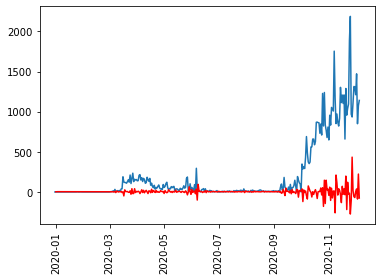

In [25]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(MYDF3, order =(1,1,0))
results_ARIMA = model.fit(disp =-1)
plt.plot(MYDF3)
plt.xticks(rotation=90)
plt.plot(results_ARIMA.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum ((results_ARIMA.fittedvalues-MYDF3['close'])**2))
print('Plotting ARIMA model')

C:\Users\L-ven Lew\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\L-ven Lew\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\L-ven Lew\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


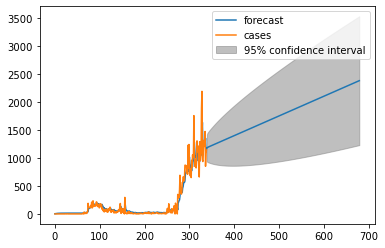

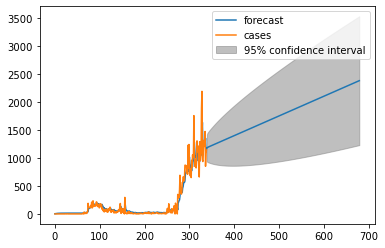

In [20]:
results_ARIMA.plot_predict(1,680)